# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
filtered_tips = tips[tips['tip_pct'] < .5 ]
filtered_tips = filtered_tips.reset_index(drop=True)

(0.0, 0.505398619388979)

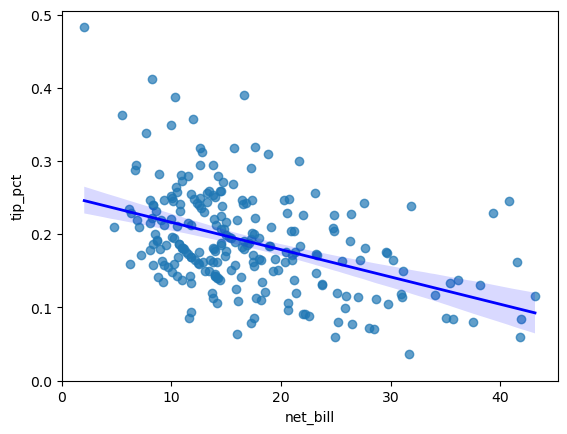

In [4]:
# Gráfico de dispersão
sns.regplot(
    y="tip_pct",
    x="net_bill",
    data=filtered_tips,
    scatter_kws={"alpha": 0.7},  # tranparencia do grafico
    line_kws={"color": "blue", "linewidth": 2}  # mudar linha de regrassão
)

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [5]:
reg = smf.ols('tip_pct~np.log(net_bill)' , data=filtered_tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           1.03e-14
Time:                        10:18:19   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.023     16.261      0.000       0.336       0.428
np.log(net_bill)    -0.0702      0.009     -8.253      0.000      -0.087      -0.053
==============================================================================
Omnibus:                       15.660   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.845
Skew:                           0.631   Prob(JB):                     0.000220
Kurtosis:                       3.280   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

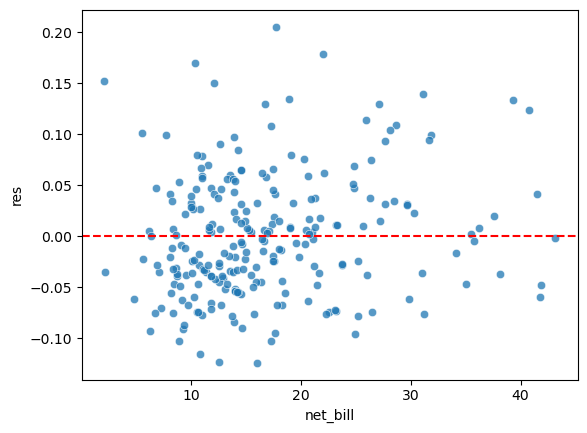

In [6]:
# vamos ver o residual (erro) e a dispersão dele
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

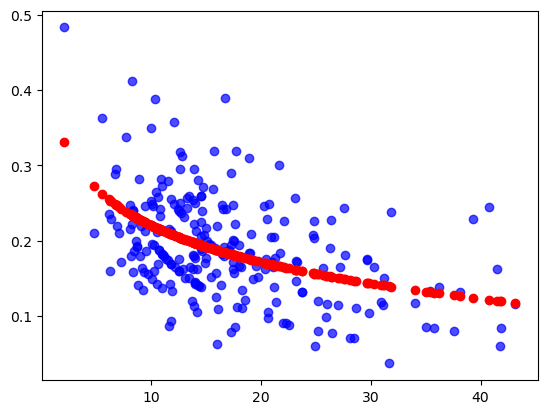

In [7]:
# GRafico da predição e dos dados reais
plt.scatter(filtered_tips['net_bill'], filtered_tips['tip_pct'], alpha=0.7, color='blue')  # dados reais
plt.scatter(filtered_tips['net_bill'], reg.fittedvalues, color='red') #predição

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [8]:
reg2 = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)' , data=filtered_tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           1.09e-12
Time:                        10:18:20   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2932      0.020     14.668      0.000       0.254       0.333
net_bill                 -0.0082      0.002     -3.961      0.000      -0.012      -0.004
np.power(net_bill, 2)     0.0001   4.67e-05      2.223      0.027    1.18e-05       0.000
==============================================================================
Omnibus:                       19.830   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.215
Skew:                           0.696   Prob(JB):                     1.50e-05
Kurtosis:                       3.514   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

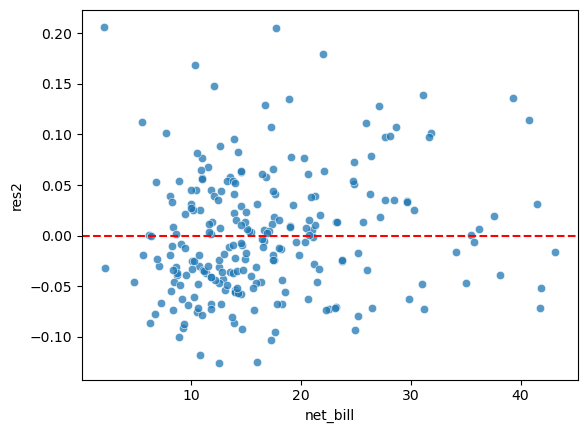

In [9]:
# vamos ver o residual (erro) e a dispersão dele
tips['res2'] = reg2.resid

sns.scatterplot(x = 'net_bill', y = 'res2', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

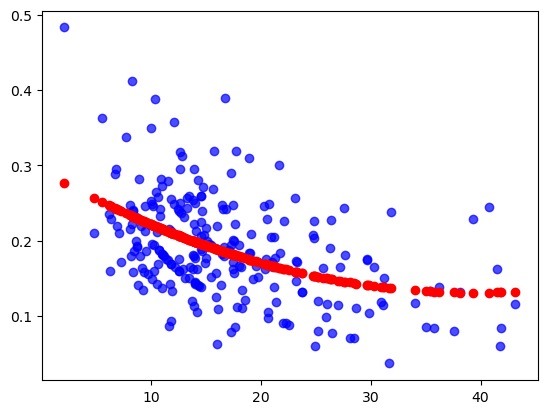

In [10]:
# GRafico da predição e dos dados reais
plt.scatter(filtered_tips['net_bill'], filtered_tips['tip_pct'], alpha=0.7, color='blue')  # dados reais
plt.scatter(filtered_tips['net_bill'], reg2.fittedvalues, color='red') #predição

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [11]:
reg3 = smf.ols('np.log(tip_pct)~net_bill' , data=filtered_tips).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           5.70e-15
Time:                        10:18:20   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.000      -1.439      -1.237
net_bill      -0.0229      0.003     -8.344      0.000      -0.028      -0.018
==============================================================================
Omnibus:                        8.210   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.483
Skew:                          -0.362   Prob(JB):                       0.0144
Kurtosis:                       3.563   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

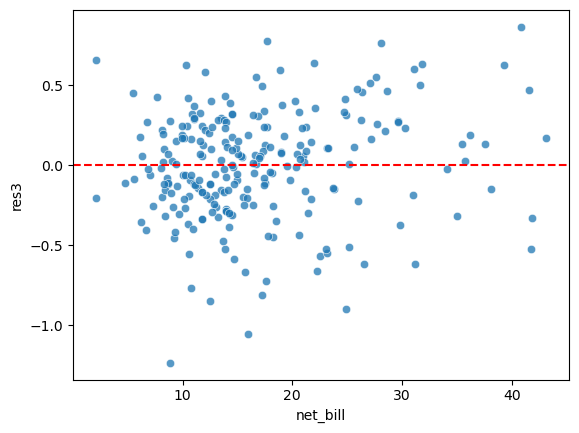

In [12]:
tips['res3'] = reg3.resid

sns.scatterplot(x = 'net_bill', y = 'res3', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [13]:
# Aqui vamos calcular o R² ajustando para o modelo original, temos que elevar a e
filtered_tips['pred3'] = np.exp(reg3.fittedvalues)
#fazendo o quadrado da correlação temos o R²
filtered_tips[['pred3', 'tip_pct']].corr().iloc[0,1]**2

0.2005148401618375

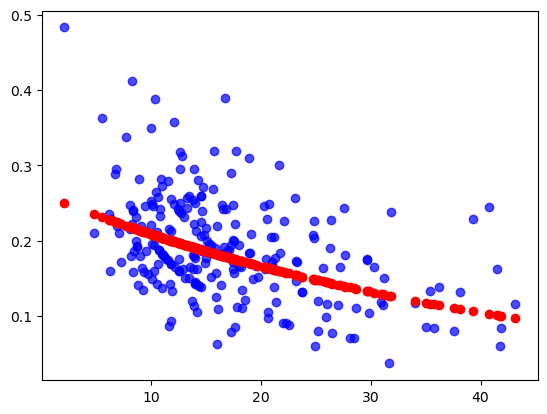

In [14]:
# GRafico da predição e dos dados reais
plt.scatter(filtered_tips['net_bill'], filtered_tips['tip_pct'], alpha=0.7, color='blue')  # dados reais
plt.scatter(filtered_tips['net_bill'], filtered_tips['pred3'], color='red') #predição

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [15]:
reg4 = smf.ols('np.log(tip_pct +.01) ~ np.log(net_bill +.01)' , data=filtered_tips).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(tip_pct + .01)   R-squared:                       0.230
Model:                               OLS   Adj. R-squared:                  0.227
Method:                    Least Squares   F-statistic:                     71.64
Date:                   Wed, 17 Apr 2024   Prob (F-statistic):           2.58e-15
Time:                           10:18:20   Log-Likelihood:                -64.348
No. Observations:                    242   AIC:                             132.7
Df Residuals:                        240   BIC:                             139.7
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.6393      0.123     -5.195      0.000      -0.882      -0.397
np.log(net_bill + .01)    -0.3771      0.045     -8.464      0.000      -0.465      -0.289
==============================================================================
Omnibus:                        5.127   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.778
Skew:                          -0.318   Prob(JB):                       0.0917
Kurtosis:                       3.262   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

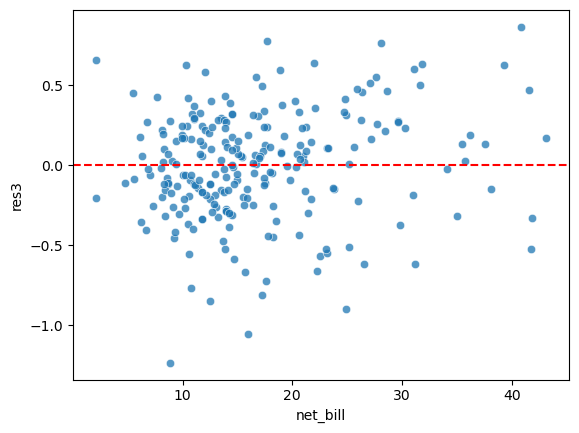

In [16]:
tips['res4'] = reg4.resid

sns.scatterplot(x = 'net_bill', y = 'res3', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [17]:
# Aqui vamos calcular o R² ajustando para o modelo original, temos que elevar a e
filtered_tips['pred4'] = np.exp(reg4.predict())
#fazendo o quadrado da correlação temos o R²
filtered_tips[['pred4', 'tip_pct']].corr().iloc[0,1]**2

0.2287918458939666

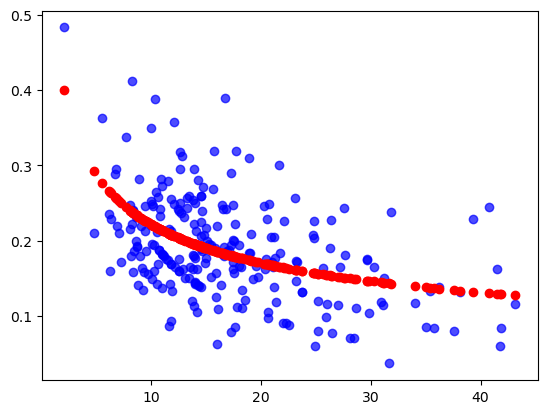

In [18]:
plt.scatter(filtered_tips['net_bill'], filtered_tips['tip_pct'], alpha=0.7, color='blue')  # dados reais
plt.scatter(filtered_tips['net_bill'], filtered_tips['pred4'], color='red') #predição

###  6. qual modelo resultou no melhor ajuste?

# o melhor modelo seria o último, no nosso caso o reg4, ele possui uma distribuição de residuo aleatória e com aspecto de independencia.